Cargar los archivos CSV

In [69]:
import pandas as pd

# Cargar los archivos CSV
calificaciones_df = pd.read_csv('input/calificaciones.csv')
carrera_df = pd.read_csv('input/carrera.csv')
escuelas_df = pd.read_csv('input/escuelas.csv')
estudiantes_df = pd.read_csv('input/estudiantes.csv')

# Ver las primeras filas de cada DataFrame
print("Calificaciones")
display(calificaciones_df.head())
print("Carrera")
display(carrera_df.head())
print("Escuela")
display(escuelas_df.head())
print("Estudiantes")
display(estudiantes_df)

Calificaciones


,periodo,clave_alumno,clave_materia,calificacion,tipo_calificacion
0,2001,0,ACB9309,100.0,1
1,2001,0,ACH9322,75.0,1
2,2001,0,ACM9313,0.0,3
3,2001,0,ACM9301,0.0,3
4,2001,0,ACC9326,93.0,1


Carrera


,clave_carrera,nombre,corto
0,0,INGENIERIA INDUSTRIAL,Industrial
1,1,INGENIERIA BIOQUIMICA,Bioquimica
2,2,INGENIERIA MECANICA,Mecanica
3,3,INGENIERIA ELECTRICA,Electrica
4,4,INGENIERIA ELECTRONICA,Electronica


Escuela


,clave,escuela
0,3,COBAES 3(PROFRA. VELINA LEON )
1,4,COBAES 4(PROFR. VICTOR M. RUB)
2,5,COBAES 5(PROFRA. FCA. GUERRER)
3,6,COBAES 6(ING.JOSE HERNANDEZ T)
4,7,COBAES 7(GRAÑ. PABLO MACIAS V)


Estudiantes


,clave_alumno,clave_carrera,sexo,prepa,colonia,municipio,ciudad,ingreso,termino,causa_salida
0,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
1,248,4,1,125,FRAC.RINCON HYA,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
2,260,4,1,71,El Walamo,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
3,261,4,1,107,4 de Marzo,25006.0,"CULIACAN, SIN.",2003.0,2051.0,4
4,262,4,2,2,Los Angeles,25006.0,CULIACAN,2003.0,2053.0,5
...,...,...,...,...,...,...,...,...,...,...
11931,11739,8,1,91,LA,25006.0,CULIACAN,2103.0,NaN,1
11932,11740,8,1,71,BALCONES,25006.0,CULIACAN,2103.0,NaN,1
11933,11825,8,1,26,San Miguel,25006.0,CULIACAN,2103.0,NaN,1
11934,11831,8,1,70,ADOLFO,25006.0,CULIACAN,2103.0,NaN,1


Explorar los datos
Verificamos si los datos contienen valores nulos, duplicados, o alguna inconsistencia:

In [39]:
# Verificar si hay valores nulos
print("Valores nulos en calificaciones:\n", calificaciones_df.isnull().sum())
print("Valores nulos en carrera:\n", carrera_df.isnull().sum())
print("Valores nulos en escuelas:\n", escuelas_df.isnull().sum())
print("Valores nulos en estudiantes:\n", estudiantes_df.isnull().sum())

# Verificar si hay duplicados
print("Duplicados en calificaciones:", calificaciones_df.duplicated().sum())
print("Duplicados en carrera:", carrera_df.duplicated().sum())
print("Duplicados en escuelas:", escuelas_df.duplicated().sum())
print("Duplicados en estudiantes:", estudiantes_df.duplicated().sum())

Valores nulos en calificaciones:
 periodo              0
clave_alumno         0
clave_materia        0
calificacion         0
tipo_calificacion    0
dtype: int64
Valores nulos en carrera:
 clave_carrera    0
nombre           0
corto            0
dtype: int64
Valores nulos en escuelas:
 clave      0
escuela    0
dtype: int64
Valores nulos en estudiantes:
 clave_alumno        0
clave_carrera       0
sexo                0
prepa               0
colonia           600
municipio         363
ciudad            287
ingreso             1
termino          5317
causa_salida        0
dtype: int64
Duplicados en calificaciones: 4
Duplicados en carrera: 0
Duplicados en escuelas: 0
Duplicados en estudiantes: 0


Limpieza de los datos

Eliminar duplicados:

In [40]:
# Eliminar duplicados
calificaciones_df = calificaciones_df.drop_duplicates()

Manejo de valores nulos:

In [41]:
# Eliminar las filas que contienen valores nulos en columnas relevantes para el analisis
estudiantes_df = estudiantes_df.dropna(subset=['colonia', 'municipio', 'ciudad', 'ingreso', 'prepa'])

Reemplazar valores incorrectos o inconsistentes:

In [42]:
# Reemplazar valores negativos por 0 en calificación
calificaciones_df['calificacion'] = calificaciones_df['calificacion'].apply(lambda x: max(x, 0))


Cambiar formato de columnas de ingreso y termino a string

In [43]:
estudiantes_df['ingreso'] = estudiantes_df['ingreso'].astype(str)
estudiantes_df['termino'] = estudiantes_df['termino'].astype(str)

Unir los DataFrames en uno solo para hacer el análisis, usando merge():

In [44]:
# Verificar las columnas de los DataFrames
print(estudiantes_df.columns)
print(escuelas_df.columns)

# Unir estudiantes con carreras
estudiantes_calificaciones_escuelas = pd.merge(estudiantes_df, calificaciones_df, on='clave_alumno', how='left')
estudiantes_carrera = pd.merge(estudiantes_calificaciones_escuelas, carrera_df, on='clave_carrera', how='left')

# Unir con escuelas usando 'clave_carrera' de estudiantes y 'clave' de escuelas
estudiantes_completos = pd.merge(estudiantes_carrera, escuelas_df, left_on='prepa', right_on='clave', how='left')

estudiantes_completos = estudiantes_completos.rename(columns={
    'nombre': 'carrera_nombre',  # Renombrar columna 'nombre' de la tabla carrera
    'corto': 'carrera_nombre_corto',
    'clave': 'preparatoria_clave',
    
    'escuela': 'preparatoria_nombre'  # Renombrar columna 'escuela' de la tabla escuelas
})

# Verificar el resultado
display(estudiantes_completos)


Index(['clave_alumno', 'clave_carrera', 'sexo', 'prepa', 'colonia',
       'municipio', 'ciudad', 'ingreso', 'termino', 'causa_salida'],
      dtype='object')
Index(['clave', 'escuela'], dtype='object')


,clave_alumno,clave_carrera,sexo,prepa,colonia,municipio,ciudad,ingreso,termino,causa_salida,periodo,clave_materia,calificacion,tipo_calificacion,carrera_nombre,carrera_nombre_corto,preparatoria_clave,preparatoria_nombre
0,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tBt2,80.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
1,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tBt1,88.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
2,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tGt4,80.0,3.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
3,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tGt5,88.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
4,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2011.0,04tAt3,70.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352849,11831,8,1,70,ADOLFO,25006.0,CULIACAN,2103.0,nan,1,2103.0,TIF1019,77.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,70.0,CONALEP I (JUAN DE DIOS BATIZ- CULIACAN)
352850,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACA0907,85.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC
352851,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACC0906,83.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC
352852,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACF0901,0.0,3.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC


Eliminar filas con valores nulos en columnas clave (calificación, materia, etc.)

In [45]:
# Eliminar filas con valores nulos en las columnas de calificaciones
estudiantes_completos_limpios = estudiantes_completos.dropna(subset=['periodo', 'clave_materia', 'calificacion', 'tipo_calificacion'])

# Guardar el DataFrame limpio
estudiantes_completos_limpios.to_csv('estudiantes_completos_limpios.csv', index=False)


In [46]:
# Cargar el archivo CSV para visualizarlo
estudiantes_completos_guardados = pd.read_csv('estudiantes_completos_limpios.csv')

# Ver las primeras filas
display(estudiantes_completos_guardados)


,clave_alumno,clave_carrera,sexo,prepa,colonia,municipio,ciudad,ingreso,termino,causa_salida,periodo,clave_materia,calificacion,tipo_calificacion,carrera_nombre,carrera_nombre_corto,preparatoria_clave,preparatoria_nombre
0,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tBt2,80.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
1,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tBt1,88.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
2,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tGt4,80.0,3.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
3,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tGt5,88.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
4,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2011.0,04tAt3,70.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352675,11831,8,1,70,ADOLFO,25006.0,CULIACAN,2103.0,NaN,1,2103.0,TIF1019,77.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,70.0,CONALEP I (JUAN DE DIOS BATIZ- CULIACAN)
352676,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACA0907,85.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC
352677,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACC0906,83.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC
352678,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACF0901,0.0,3.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC


### Agrupar los datos para facilitar el analisis
se crean columnas de agregacion para analizar el desempeño global de cada alumno
facilitando la comparación entre estudiantes segun sus características

In [47]:
# Crear columnas de agregación
datos_agrupados = estudiantes_completos.groupby('clave_alumno').agg(
    materias_aprobadas=('calificacion', lambda x: (x >= 70).sum()),
    materias_reprobadas=('calificacion', lambda x: (x < 70).sum()),
    materias_totales=('calificacion', 'size'),
    promedio_calificaciones=('calificacion', 'mean'),
    desviacion_calificaciones=('calificacion', 'std'),
    duracion_estudios=('periodo', lambda x: len(set(x))),
    causa_salida=('causa_salida', 'first'),
    sexo=('sexo', 'first'),
    prepa=('preparatoria_clave', 'first'),
    prepa_nombre=('preparatoria_nombre', 'first'),
    carrera=('carrera_nombre_corto', 'first'),
    ciudad=('ciudad', 'first'),
    colonia=('colonia', 'first')
).reset_index()

# Revisar el resultado
display(datos_agrupados)


,clave_alumno,materias_aprobadas,materias_reprobadas,materias_totales,promedio_calificaciones,desviacion_calificaciones,duracion_estudios,causa_salida,sexo,prepa,prepa_nombre,carrera,ciudad,colonia
0,1,6,4,10,50.300000,43.815396,2,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Villa de Guadalupe
1,2,10,6,16,55.125000,45.070131,3,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Las Mañanitas
2,3,54,5,59,78.644068,25.825517,10,5,1,NaN,None,Industrial,CULIACAN,Morelos
3,4,48,16,64,58.765625,35.171571,13,4,2,36.0,COBAES 36(JOSE C.VALADEZ ROCH),Industrial,CUALIACAN,El Walamo
4,5,9,1,10,81.900000,29.990554,2,4,2,58.0,COBAES 58(ING.HERIBERTO VALDE),Industrial,CULIACAN,Las Granjas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11107,11960,0,0,1,NaN,NaN,1,1,1,89.0,INSTITUTO SIGLO XXI S.C.,Industrial,CULIACAN,Humaya
11108,11961,0,0,1,NaN,NaN,1,1,1,NaN,None,Industrial,DURANGO,Villa del Real
11109,11962,0,0,1,NaN,NaN,1,1,1,22.0,COBAES 22(PROFR.MIGUEL CRISTO),Industrial,CULIACAN,4 de Marzo
11110,11964,0,0,1,NaN,NaN,1,1,1,NaN,None,Sistemas,CULIACAN,Universidad 94


### Preprocesamiento para random forest
Crear variable categorica para campos no numericos que son necesarios en el analisis

In [48]:
# Codificación de variables categóricas
from sklearn.preprocessing import LabelEncoder

le_carrera = LabelEncoder()
le_ciudad = LabelEncoder()
le_colonia = LabelEncoder()

# Aplicamos la codificación
datos_agrupados['carrera_codificada'] = le_carrera.fit_transform(datos_agrupados['carrera'])
datos_agrupados['ciudad_codificada'] = le_ciudad.fit_transform(datos_agrupados['ciudad'])
datos_agrupados['colonia_codificada'] = le_colonia.fit_transform(datos_agrupados['colonia'])

display(datos_agrupados)

,clave_alumno,materias_aprobadas,materias_reprobadas,materias_totales,promedio_calificaciones,desviacion_calificaciones,duracion_estudios,causa_salida,sexo,prepa,prepa_nombre,carrera,ciudad,colonia,carrera_codificada,ciudad_codificada,colonia_codificada
0,1,6,4,10,50.300000,43.815396,2,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Villa de Guadalupe,3,108,774
1,2,10,6,16,55.125000,45.070131,3,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Las Mañanitas,3,108,502
2,3,54,5,59,78.644068,25.825517,10,5,1,NaN,None,Industrial,CULIACAN,Morelos,3,108,557
3,4,48,16,64,58.765625,35.171571,13,4,2,36.0,COBAES 36(JOSE C.VALADEZ ROCH),Industrial,CUALIACAN,El Walamo,3,97,262
4,5,9,1,10,81.900000,29.990554,2,4,2,58.0,COBAES 58(ING.HERIBERTO VALDE),Industrial,CULIACAN,Las Granjas,3,108,501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11107,11960,0,0,1,NaN,NaN,1,1,1,89.0,INSTITUTO SIGLO XXI S.C.,Industrial,CULIACAN,Humaya,3,108,394
11108,11961,0,0,1,NaN,NaN,1,1,1,NaN,None,Industrial,DURANGO,Villa del Real,3,151,775
11109,11962,0,0,1,NaN,NaN,1,1,1,22.0,COBAES 22(PROFR.MIGUEL CRISTO),Industrial,CULIACAN,4 de Marzo,3,108,17
11110,11964,0,0,1,NaN,NaN,1,1,1,NaN,None,Sistemas,CULIACAN,Universidad 94,7,108,737


Volver a revisar que no existan valores nulos en las columnas necesarias para el analisis

In [50]:
datos_agrupados.dropna(subset=['prepa'], inplace=True)
datos_agrupados.to_csv('datos_agrupados.csv', index=False)
display(datos_agrupados)

,clave_alumno,materias_aprobadas,materias_reprobadas,materias_totales,promedio_calificaciones,desviacion_calificaciones,duracion_estudios,causa_salida,sexo,prepa,prepa_nombre,carrera,ciudad,colonia,carrera_codificada,ciudad_codificada,colonia_codificada
0,1,6,4,10,50.300000,43.815396,2,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Villa de Guadalupe,3,108,774
1,2,10,6,16,55.125000,45.070131,3,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Las Mañanitas,3,108,502
3,4,48,16,64,58.765625,35.171571,13,4,2,36.0,COBAES 36(JOSE C.VALADEZ ROCH),Industrial,CUALIACAN,El Walamo,3,97,262
4,5,9,1,10,81.900000,29.990554,2,4,2,58.0,COBAES 58(ING.HERIBERTO VALDE),Industrial,CULIACAN,Las Granjas,3,108,501
5,6,56,1,57,85.368421,14.505703,10,5,1,31.0,COBAES 31(PROFRA.IRMA GARMEND),Industrial,"ELDORADO, CLN",FIDEL VELAZQUEZ,3,188,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11105,11956,0,0,1,NaN,NaN,1,1,1,59.0,COBAES 59 (CRISTINO C. ROMO ),Industrial,ANGOSTURA,Gustavo Diaz Ordaz,3,28,380
11106,11957,0,0,1,NaN,NaN,1,1,1,59.0,COBAES 59 (CRISTINO C. ROMO ),Industrial,ANGOSTURA,Gustavo Diaz Ordaz,3,28,380
11107,11960,0,0,1,NaN,NaN,1,1,1,89.0,INSTITUTO SIGLO XXI S.C.,Industrial,CULIACAN,Humaya,3,108,394
11109,11962,0,0,1,NaN,NaN,1,1,1,22.0,COBAES 22(PROFR.MIGUEL CRISTO),Industrial,CULIACAN,4 de Marzo,3,108,17


### Exploracion de columnas

                           clave_alumno  materias_aprobadas  \
clave_alumno                   1.000000           -0.543970   
materias_aprobadas            -0.543970            1.000000   
materias_reprobadas           -0.359306            0.060010   
materias_totales              -0.598953            0.979510   
promedio_calificaciones        0.031070            0.569255   
desviacion_calificaciones     -0.111934           -0.282309   
duracion_estudios             -0.609730            0.943536   
causa_salida                  -0.775140            0.369438   
sexo                          -0.051257            0.136705   
prepa                          0.262634           -0.085797   
carrera_codificada             0.180104           -0.125788   
ciudad_codificada              0.053353           -0.001851   
colonia_codificada             0.019120           -0.010433   

                           materias_reprobadas  materias_totales  \
clave_alumno                         -0.359306   

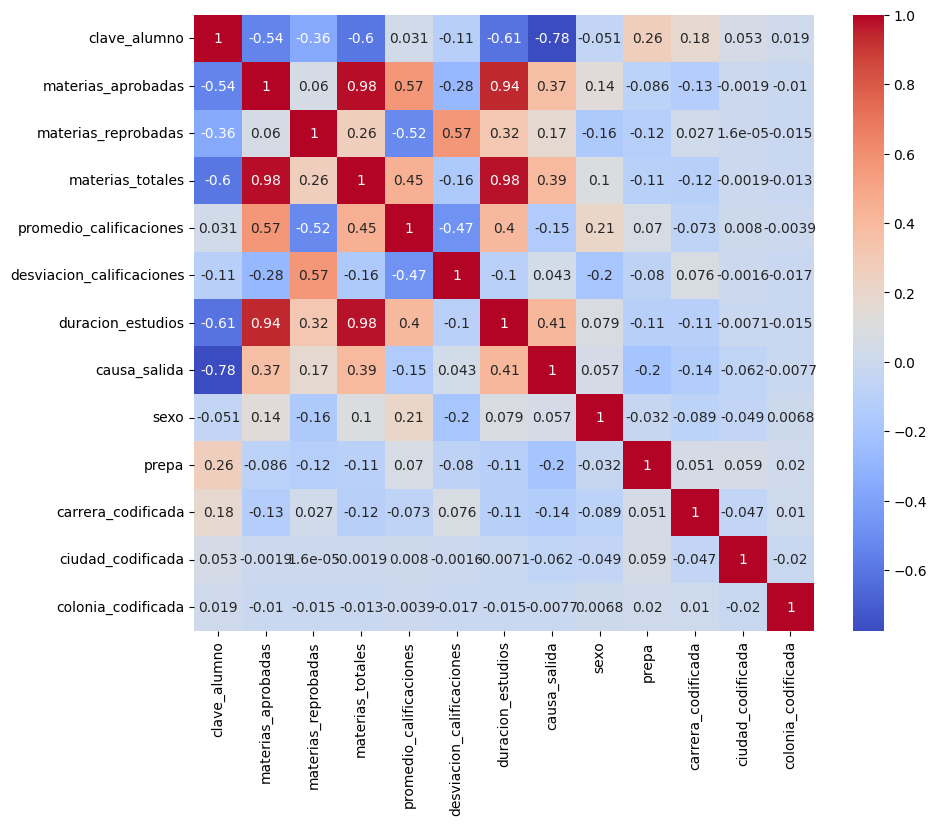

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
columnas_numericas = datos_agrupados.select_dtypes(include=['float64', 'int64']).columns

# Matriz de correlación para las columnas numéricas
correlation_matrix = datos_agrupados[columnas_numericas].corr()
print(correlation_matrix)

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Dividir el dataset entre alumnos vigentes y egresados

In [52]:
egresados = datos_agrupados[datos_agrupados['causa_salida'] != 1]  
vigentes = datos_agrupados[datos_agrupados['causa_salida'] == 1] 

display(egresados)
display(vigentes)

,clave_alumno,materias_aprobadas,materias_reprobadas,materias_totales,promedio_calificaciones,desviacion_calificaciones,duracion_estudios,causa_salida,sexo,prepa,prepa_nombre,carrera,ciudad,colonia,carrera_codificada,ciudad_codificada,colonia_codificada
0,1,6,4,10,50.300000,43.815396,2,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Villa de Guadalupe,3,108,774
1,2,10,6,16,55.125000,45.070131,3,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Las Mañanitas,3,108,502
3,4,48,16,64,58.765625,35.171571,13,4,2,36.0,COBAES 36(JOSE C.VALADEZ ROCH),Industrial,CUALIACAN,El Walamo,3,97,262
4,5,9,1,10,81.900000,29.990554,2,4,2,58.0,COBAES 58(ING.HERIBERTO VALDE),Industrial,CULIACAN,Las Granjas,3,108,501
5,6,56,1,57,85.368421,14.505703,10,5,1,31.0,COBAES 31(PROFRA.IRMA GARMEND),Industrial,"ELDORADO, CLN",FIDEL VELAZQUEZ,3,188,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10964,11801,0,4,4,0.000000,0.000000,1,4,1,127.0,UAS (NAVOLATO),Sistemas,NAVOLATO,Alcanfores,7,274,75
10989,11829,1,4,5,20.000000,44.721360,1,4,1,71.0,CONALEP (CULIACAN II),Sistemas,CULIACAN,Pemex,7,108,614
10997,11840,2,2,4,42.000000,48.504295,1,4,1,95.0,COBAC,TIC,CULIACAN,Las Mañanitas,8,108,502
11003,11846,6,0,6,88.833333,10.186592,1,2,1,26.0,COBAES 26(GRAL. ANGEL FLORES),Bioquimica,CULIACAN,El Walamo,0,108,262


,clave_alumno,materias_aprobadas,materias_reprobadas,materias_totales,promedio_calificaciones,desviacion_calificaciones,duracion_estudios,causa_salida,sexo,prepa,prepa_nombre,carrera,ciudad,colonia,carrera_codificada,ciudad_codificada,colonia_codificada
1079,1149,43,24,67,52.925373,40.682553,16,1,1,56.0,COBAES 56(GRAL. MACARIO GAXIO),Informatica,CULIACAN,Villa del Real,4,108,775
2807,3002,45,5,50,77.940000,27.724159,10,1,1,107.0,C.B.T.I.S. 224,Industrial,CULIACAN,INF.,3,108,401
2848,3047,44,7,51,71.058824,29.524506,11,1,1,107.0,C.B.T.I.S. 224,Industrial,CULIACAN,IND.,3,108,396
2956,3156,25,14,39,49.846154,38.224777,9,1,1,112.0,C.B.T.I.S. 45,Mecanica,CULIACAN,Las Granjas,5,108,501
2983,3183,44,7,51,68.705882,28.582718,11,1,1,151.0,UAS (CONCORDIA),Mecanica,CULIACAN,INF.,5,108,401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11105,11956,0,0,1,NaN,NaN,1,1,1,59.0,COBAES 59 (CRISTINO C. ROMO ),Industrial,ANGOSTURA,Gustavo Diaz Ordaz,3,28,380
11106,11957,0,0,1,NaN,NaN,1,1,1,59.0,COBAES 59 (CRISTINO C. ROMO ),Industrial,ANGOSTURA,Gustavo Diaz Ordaz,3,28,380
11107,11960,0,0,1,NaN,NaN,1,1,1,89.0,INSTITUTO SIGLO XXI S.C.,Industrial,CULIACAN,Humaya,3,108,394
11109,11962,0,0,1,NaN,NaN,1,1,1,22.0,COBAES 22(PROFR.MIGUEL CRISTO),Industrial,CULIACAN,4 de Marzo,3,108,17


Relacion entre la duracion de los estudios con el promedio

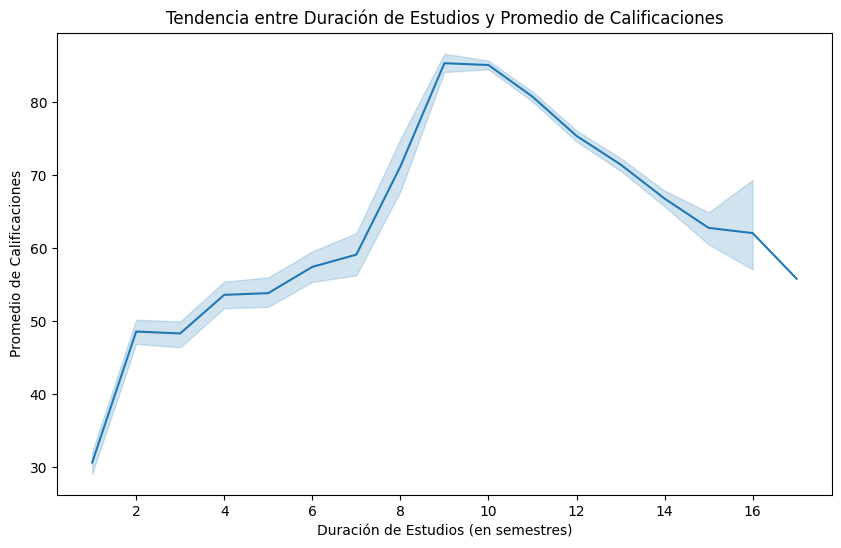

In [63]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='duracion_estudios', y='promedio_calificaciones', data=egresados)
plt.title('Tendencia entre Duración de Estudios y Promedio de Calificaciones')
plt.xlabel('Duración de Estudios (en semestres)')
plt.ylabel('Promedio de Calificaciones')
plt.show()

Conocer las causas de salida mas comunes en cada carrera

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reemplazar los valores numéricos de 'causa_salida' por sus etiquetas
causas_salida_labels = {
    2: 'Baja Temporal',
    3: 'Baja Definitiva',
    4: 'Baja Especial',
    5: 'Egresado'
}

# Aplicar las etiquetas a la columna 'causa_salida'
egresados['causa_salida'] = egresados['causa_salida'].map(causas_salida_labels)

# Filtrar solo los egresados (causa_salida == 'Egresado') y agrupar por carrera y causa de salida
causas_por_carrera = egresados.groupby(['carrera', 'causa_salida']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 7))
causas_por_carrera.plot(kind='bar', stacked=True, colormap='Set3', figsize=(14, 7))

# Configuración del gráfico
plt.title('Causa de Salida por Carrera (Solo Egresados)')
plt.xlabel('Carrera')
plt.ylabel('Número de Alumnos')
plt.xticks(rotation=90)
plt.legend(title='Causa de Salida', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


/tmp/ipykernel_4998/2834584380.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egresados['causa_salida'] = egresados['causa_salida'].map(causas_salida_labels)


TypeError: no numeric data to plot

<Figure size 1400x700 with 0 Axes>

### Seleccion de caracteristicas y variable objetivo del random forest

In [16]:
# Selección de las características y el target
x = datos_agrupados[['ciudad_codificada', 'colonia_codificada', 
                           'sexo', 'carrera_codificada', 'prepa', 'materias_totales', 'materias_reprobadas']]

# Variable objetivo: 'materias_aprobadas' (aprobado o reprobado)
y = datos_agrupados['materias_aprobadas']


### Entrenamiento del random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    random_state=42
)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.5962417470797359
Confusion Matrix:
[[91  1  0 ...  0  0  0]
 [ 8 40  3 ...  0  0  0]
 [ 3  1 37 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  1  0]
 [ 0  0  0 ...  2 12  0]
 [ 0  0  0 ...  0  2  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        92
           1       0.95      0.78      0.86        51
           2       0.86      0.84      0.85        44
           3       0.91      0.76      0.83        70
           4       0.76      0.87      0.81        76
           5       0.81      0.88      0.84        92
           6       0.91      0.87      0.89       123
           7       0.56      0.38      0.45        26
           8       0.41      0.44      0.42        25
           9       0.31      0.22      0.26        23
          10       0.50      0.43      0.46        21
          11       0.40      0.63      0.49        27
          12       0.36      0.58      0.44        24
          13     

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ajuste de hiperparametros

In [18]:
# Ajuste de hiperparámetros con GridSearchCV
from sklearn.model_selection import GridSearchCV
'''
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)
'''


'\nparam_grid = {\n    \'n_estimators\': [100, 200],\n    \'max_depth\': [10, 20, None],\n    \'min_samples_split\': [2, 5, 10]\n}\n\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Mostrar los mejores parámetros\nprint("Mejores parámetros:", grid_search.best_params_)\n'